In [1]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import nltk
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')
from string import punctuation
custom = stop_words+list(punctuation)
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Devyani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Devyani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Devyani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
def my_tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t)>2] #remove words lesser than 2 in length
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] #lemmatize words
    tokens = [t for t in tokens if t not in custom] #remove stopwords and punctuation
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove digits
    return tokens

In [3]:
import os
os.chdir(r"G:\SEM 3 DATA SCIENCE\NLP")

In [4]:
df = pd.read_csv("Consumer_Complaints (1).csv")
df = df[["Consumer complaint narrative"]]
df = df.dropna()
df = df[:10]

In [5]:
df.columns = ["text"]
print(df.isnull().sum())
df.head()

text    0
dtype: int64


,text
43037,!!!!!! This is not a Duplicate!!!! I have cont...
44968,{$16000.00}. This is not my debt.
47834,When they call they dont answer the call and t...
48834,I provided account information which showed de...
49002,There are 2 charges on my credit report from a...


In [6]:
text = df["text"].tolist()
text = [my_tokenizer(s) for s in text]

In [7]:
import gensim
from gensim.corpora import dictionary
from gensim import corpora
from pprint import pprint

In [8]:
id2word = corpora.Dictionary(text)

In [9]:
print (id2word)

Dictionary(242 unique tokens: ['abide', 'abusive', 'account', 'apartment', 'application']...)


In [10]:
print (id2word.token2id)

{'abide': 0, 'abusive': 1, 'account': 2, 'apartment': 3, 'application': 4, 'asked': 5, 'associated': 6, 'attached': 7, 'attaching': 8, 'attempted': 9, 'belong': 10, 'blocked': 11, 'character': 12, 'collection': 13, 'committed': 14, 'complaint': 15, 'consumer': 16, 'contact': 17, 'contacted': 18, 'copy': 19, 'course': 20, 'credit': 21, 'debt': 22, 'defaming': 23, 'department': 24, 'detailed': 25, 'directly': 26, 'distress': 27, 'doe': 28, 'done': 29, 'duplicate': 30, 'emotional': 31, 'even': 32, 'experian': 33, 'fcra': 34, 'fee': 35, 'file': 36, 'fraud': 37, 'fraudulent': 38, 'ha': 39, 'identity': 40, 'inflicting': 41, 'information': 42, 'intentionally': 43, 'know': 44, 'left': 45, 'mail': 46, 'message': 47, 'name': 48, 'never': 49, 'noticed': 50, 'placed': 51, 'police': 52, 'provided': 53, 'recent': 54, 'refused': 55, 'regarding': 56, 'relation': 57, 'remove': 58, 'rent': 59, 'report': 60, 'reported': 61, 'reporting': 62, 'responded': 63, 'result': 64, 'returned': 65, 'section': 66, 's

In [11]:
mycorpus = [id2word.doc2bow(s) for s in text]
print(len(mycorpus))

10


In [12]:
mycorpus[0]

[(0, 1),
 (1, 1),
 (2, 4),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 3),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 3),
 (19, 1),
 (20, 1),
 (21, 6),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 2),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 3),
 (34, 1),
 (35, 1),
 (36, 4),
 (37, 3),
 (38, 5),
 (39, 4),
 (40, 1),
 (41, 1),
 (42, 2),
 (43, 1),
 (44, 1),
 (45, 2),
 (46, 1),
 (47, 3),
 (48, 2),
 (49, 1),
 (50, 1),
 (51, 2),
 (52, 2),
 (53, 1),
 (54, 1),
 (55, 2),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 3),
 (61, 1),
 (62, 2),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 3),
 (72, 1),
 (73, 1),
 (74, 1),
 (75, 6),
 (76, 1),
 (77, 33)]

In [13]:
#LDA Model

lda_model = gensim.models.ldamodel.LdaModel(corpus=mycorpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=42,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

4 Topics

In [14]:
pprint(lda_model.print_topics())
doc_lda = lda_model[mycorpus]

[(0,
  '0.061*"xxxx" + 0.044*"account" + 0.044*"ha" + 0.036*"hollins" + '
  '0.036*"kent" + 0.019*"also" + 0.019*"social" + 0.019*"security" + '
  '0.019*"informed" + 0.019*"garnish"'),
 (1,
  '0.095*"xxxx" + 0.021*"dispute" + 0.021*"bill" + 0.021*"medical" + '
  '0.016*"phone" + 0.016*"collection" + 0.016*"time" + 0.016*"wa" + '
  '0.016*"amount" + 0.016*"financial"'),
 (2,
  '0.130*"xxxx" + 0.031*"credit" + 0.027*"account" + 0.027*"wa" + '
  '0.020*"fraudulent" + 0.016*"file" + 0.016*"ha" + 0.016*"report" + '
  '0.012*"collection" + 0.012*"information"'),
 (3,
  '0.107*"xxxx" + 0.028*"agency" + 0.028*"credit" + 0.023*"call" + '
  '0.023*"removed" + 0.017*"sign" + 0.017*"company" + 0.017*"equifax" + '
  '0.017*"satisfied" + 0.017*"one"')]


In [15]:
print('\nPerplexity: ', lda_model.log_perplexity(mycorpus))  # a measure of how good the model is. lower the better.


Perplexity:  -5.178351510148075


In [16]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=text, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6754899716404427


In [17]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, mycorpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.064464  0.089895       1        1  38.513596
1      0.105492 -0.008004       2        1  26.681475
3     -0.064833 -0.096897       3        1  23.878387
0      0.023804  0.015007       4        1  10.926541, topic_info=     Category       Freq        Term      Total  loglift  logprob
term                                                             
39    Default   6.000000          ha   6.000000  30.0000  30.0000
192   Default   2.000000     hollins   2.000000  29.0000  29.0000
194   Default   2.000000        kent   2.000000  28.0000  28.0000
2     Default  11.000000     account  11.000000  27.0000  27.0000
78    Default   5.000000      agency   5.000000  26.0000  26.0000
96    Default   3.000000     removed   3.000000  25.0000  25.0000
137   Default   3.000000    informed   3.000000  24.0000  24.0000
179   Default   3.000000     dispute   3.000000  23.0000  23.0000
228   Default   3.000000     medical   3.000000  22.0000  22.0000
128   Default   2.000000        also   2.000000  21.0000  21.0000
81    Default   4.000000        call   4.000000  20.0000  20.0000
200   Default   1.000000      social   1.000000  19.0000  19.0000
198   Default   1.000000    security   1.000000  18.0000  18.0000
190   Default   1.000000     garnish   1.000000  17.0000  17.0000
110   Default   3.000000      amount   3.000000  16.0000  16.0000
97    Default   2.000000        sign   2.000000  15.0000  15.0000
133   Default   2.000000     equifax   2.000000  14.0000  14.0000
154   Default   2.000000   satisfied   2.000000  13.0000  13.0000
144   Default   2.000000         one   2.000000  12.0000  12.0000
99    Default   4.000000        bill   4.000000  11.0000  11.0000
38    Default   4.000000  fraudulent   4.000000  10.0000  10.0000
75    Default   8.000000          wa   8.000000   9.0000   9.0000
215   Default   2.000000   financial   2.000000   8.0000   8.0000
193   Default   2.000000      income   2.000000   7.0000   7.0000
121   Default   2.000000     payment   2.000000   6.0000   6.0000
85    Default   3.000000     company   3.000000   5.0000   5.0000
70    Default   4.000000        time   4.000000   4.0000   4.0000
146   Default   3.000000       phone   3.000000   3.0000   3.0000
93    Default   1.000000        made   1.000000   2.0000   2.0000
160   Default   1.000000       today   1.000000   1.0000   1.0000
...       ...        ...         ...        ...      ...      ...
200    Topic4   1.100970      social   1.646027   1.8118  -3.9665
198    Topic4   1.100818    security   1.646178   1.8116  -3.9666
190    Topic4   1.100213     garnish   1.646492   1.8108  -3.9672
191    Topic4   0.612165        good   1.153177   1.5807  -4.5534
188    Topic4   0.612150        fact   1.153169   1.5807  -4.5534
196    Topic4   0.612116      obtain   1.153182   1.5806  -4.5535
189    Topic4   0.611999        fund   1.153222   1.5804  -4.5537
197    Topic4   0.611985  repeatedly   1.153255   1.5803  -4.5537
186    Topic4   0.611972  circumvent   1.153278   1.5803  -4.5537
199    Topic4   0.611906        shut   1.153275   1.5802  -4.5538
201    Topic4   0.611852        sole   1.153336   1.5801  -4.5539
187    Topic4   0.611814      closed   1.153327   1.5800  -4.5540
202    Topic4   0.611761     towards   1.153374   1.5799  -4.5541
195    Topic4   0.611609     legally   1.153421   1.5796  -4.5543
128    Topic4   1.100998        also   2.328863   1.4648  -3.9665
39     Topic4   2.566882          ha   6.193189   1.3332  -3.1200
137    Topic4   1.100611    informed   3.011388   1.2074  -3.9668
93     Topic4   0.613575        made   1.834254   1.1189  -4.5511
160    Topic4   0.612111       today   1.835511   1.1158  -4.5535
184    Topic4   0.611930       tried   1.855096   1.1049  -4.5538
176    Topic4   0.611761      trying   1.920430   1.0700  -4.5541
44     Topic4   0.611554        know   1.920510   1.0696  -4.5544
173

Checking for Optimum no. of Topics

In [19]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=mycorpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [20]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=mycorpus, texts=text, start=2, limit=40, step=6)

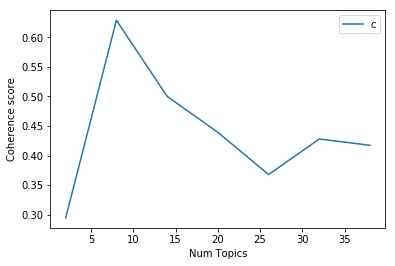

In [21]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [22]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.2946
Num Topics = 8  has Coherence Value of 0.629
Num Topics = 14  has Coherence Value of 0.5002
Num Topics = 20  has Coherence Value of 0.4394
Num Topics = 26  has Coherence Value of 0.3679
Num Topics = 32  has Coherence Value of 0.4281
Num Topics = 38  has Coherence Value of 0.4174


In [23]:
#Selecting 14 topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.064*"xxxx" + 0.047*"account" + 0.044*"ha" + 0.042*"hollins" + '
  '0.040*"kent" + 0.021*"garnish" + 0.020*"informed" + 0.019*"security" + '
  '0.018*"social" + 0.016*"also"'),
 (1,
  '0.059*"xxxx" + 0.038*"dispute" + 0.035*"credit" + 0.029*"agency" + '
  '0.025*"never" + 0.021*"sign" + 0.020*"call" + 0.017*"contact" + '
  '0.016*"company" + 0.016*"amount"'),
 (2,
  '0.004*"debt" + 0.004*"xxxx" + 0.004*"account" + 0.004*"credit" + '
  '0.004*"number" + 0.004*"dispute" + 0.004*"wa" + 0.004*"month" + '
  '0.004*"company" + 0.004*"report"'),
 (3,
  '0.004*"debt" + 0.004*"xxxx" + 0.004*"account" + 0.004*"credit" + '
  '0.004*"dispute" + 0.004*"number" + 0.004*"bill" + 0.004*"report" + '
  '0.004*"collection" + 0.004*"company"'),
 (4,
  '0.133*"xxxx" + 0.035*"credit" + 0.032*"agency" + 0.026*"satisfied" + '
  '0.025*"removed" + 0.024*"account" + 0.023*"equifax" + 0.021*"one" + '
  '0.018*"spoke" + 0.018*"collection"'),
 (5,
  '0.168*"xxxx" + 0.042*"credit" + 0.025*"account" + 0.024

Get the Dominant topic, Perc Contribution and Keywords for each document (with 14 topics)

In [24]:
def format_topics_sentences(ldamodel=lda_model, corpus=mycorpus, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=mycorpus, texts=text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.9940,"xxxx, credit, account, fraudulent, file, wa, c...","[duplicate, contacted, xxxx, xxxx, experian, f..."
1,1,11.0,0.5357,"paid, account, still, credit, number, dorageto...",[debt]
2,2,1.0,0.9727,"xxxx, dispute, credit, agency, never, sign, ca...","[call, dont, answer, call, call, day, long, ha..."
3,3,11.0,0.9629,"paid, account, still, credit, number, dorageto...","[provided, account, information, showed, debt,..."
4,4,1.0,0.9700,"xxxx, dispute, credit, agency, never, sign, ca...","[charge, credit, report, collection, agency, t..."
5,5,4.0,0.9902,"xxxx, credit, agency, satisfied, removed, acco...","[xxxx, xxxx, xxxx, xxxx, posted, collection, a..."
6,6,9.0,0.9643,"month, every, causing, authorization, sent, de...","[xxxx, month, every, month, since, 've, reciev..."
7,7,1.0,0.9484,"xxxx, dispute, credit, agency, never, sign, ca...","[filed, dispute, credit, karma, file, another,..."
8,8,0.0,0.7696,"xxxx, account, ha, hollins, kent, garnish, inf...","[today, recieved, letter, kent, hollins, accou..."
9,9,12.0,0.9903,"xxxx, wa, bill, medical, time, collection, fin...","[visited, xxxx, xxxx, xxxx, xxxx, xxxx, illnes..."


Get the Dominant topic, Perc Contribution and Keywords for each document (with 4 topics)

In [25]:
def format_topics_sentences(ldamodel=None, corpus=mycorpus, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=mycorpus, texts=text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.9991,"xxxx, credit, account, wa, fraudulent, file, h...","[duplicate, contacted, xxxx, xxxx, experian, f..."
1,1,2.0,0.8803,"xxxx, credit, account, wa, fraudulent, file, h...",[debt]
2,2,3.0,0.9948,"xxxx, agency, credit, call, removed, sign, com...","[call, dont, answer, call, call, day, long, ha..."
3,3,2.0,0.9940,"xxxx, credit, account, wa, fraudulent, file, h...","[provided, account, information, showed, debt,..."
4,4,1.0,0.9947,"xxxx, dispute, bill, medical, phone, collectio...","[charge, credit, report, collection, agency, t..."
5,5,3.0,0.9982,"xxxx, agency, credit, call, removed, sign, com...","[xxxx, xxxx, xxxx, xxxx, posted, collection, a..."
6,6,2.0,0.9942,"xxxx, credit, account, wa, fraudulent, file, h...","[xxxx, month, every, month, since, 've, reciev..."
7,7,1.0,0.9907,"xxxx, dispute, bill, medical, phone, collectio...","[filed, dispute, credit, karma, file, another,..."
8,8,0.0,0.9968,"xxxx, account, ha, hollins, kent, also, social...","[today, recieved, letter, kent, hollins, accou..."
9,9,1.0,0.9983,"xxxx, dispute, bill, medical, phone, collectio...","[visited, xxxx, xxxx, xxxx, xxxx, xxxx, illnes..."


In [26]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9968,"xxxx, account, ha, hollins, kent, also, social, security, informed, garnish","[today, recieved, letter, kent, hollins, account, xxxx, xxxx, account, kent, hollins, ha, inform..."
1,1.0,0.9983,"xxxx, dispute, bill, medical, phone, collection, time, wa, amount, financial","[visited, xxxx, xxxx, xxxx, xxxx, xxxx, illness, wa, bill, amount, total, time, wa, experiencing..."
2,2.0,0.9991,"xxxx, credit, account, wa, fraudulent, file, ha, report, collection, information","[duplicate, contacted, xxxx, xxxx, experian, fraudulent, collection, account, reported, credit, ..."
3,3.0,0.9982,"xxxx, agency, credit, call, removed, sign, company, equifax, satisfied, one","[xxxx, xxxx, xxxx, xxxx, posted, collection, account, credit, reporting, company, xxxx, xxxx, xx..."


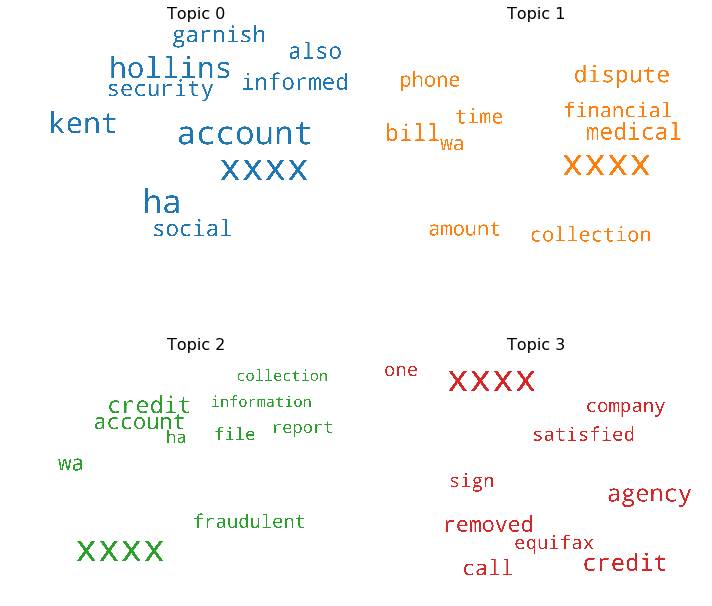

In [27]:
!pip install wordcloud
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

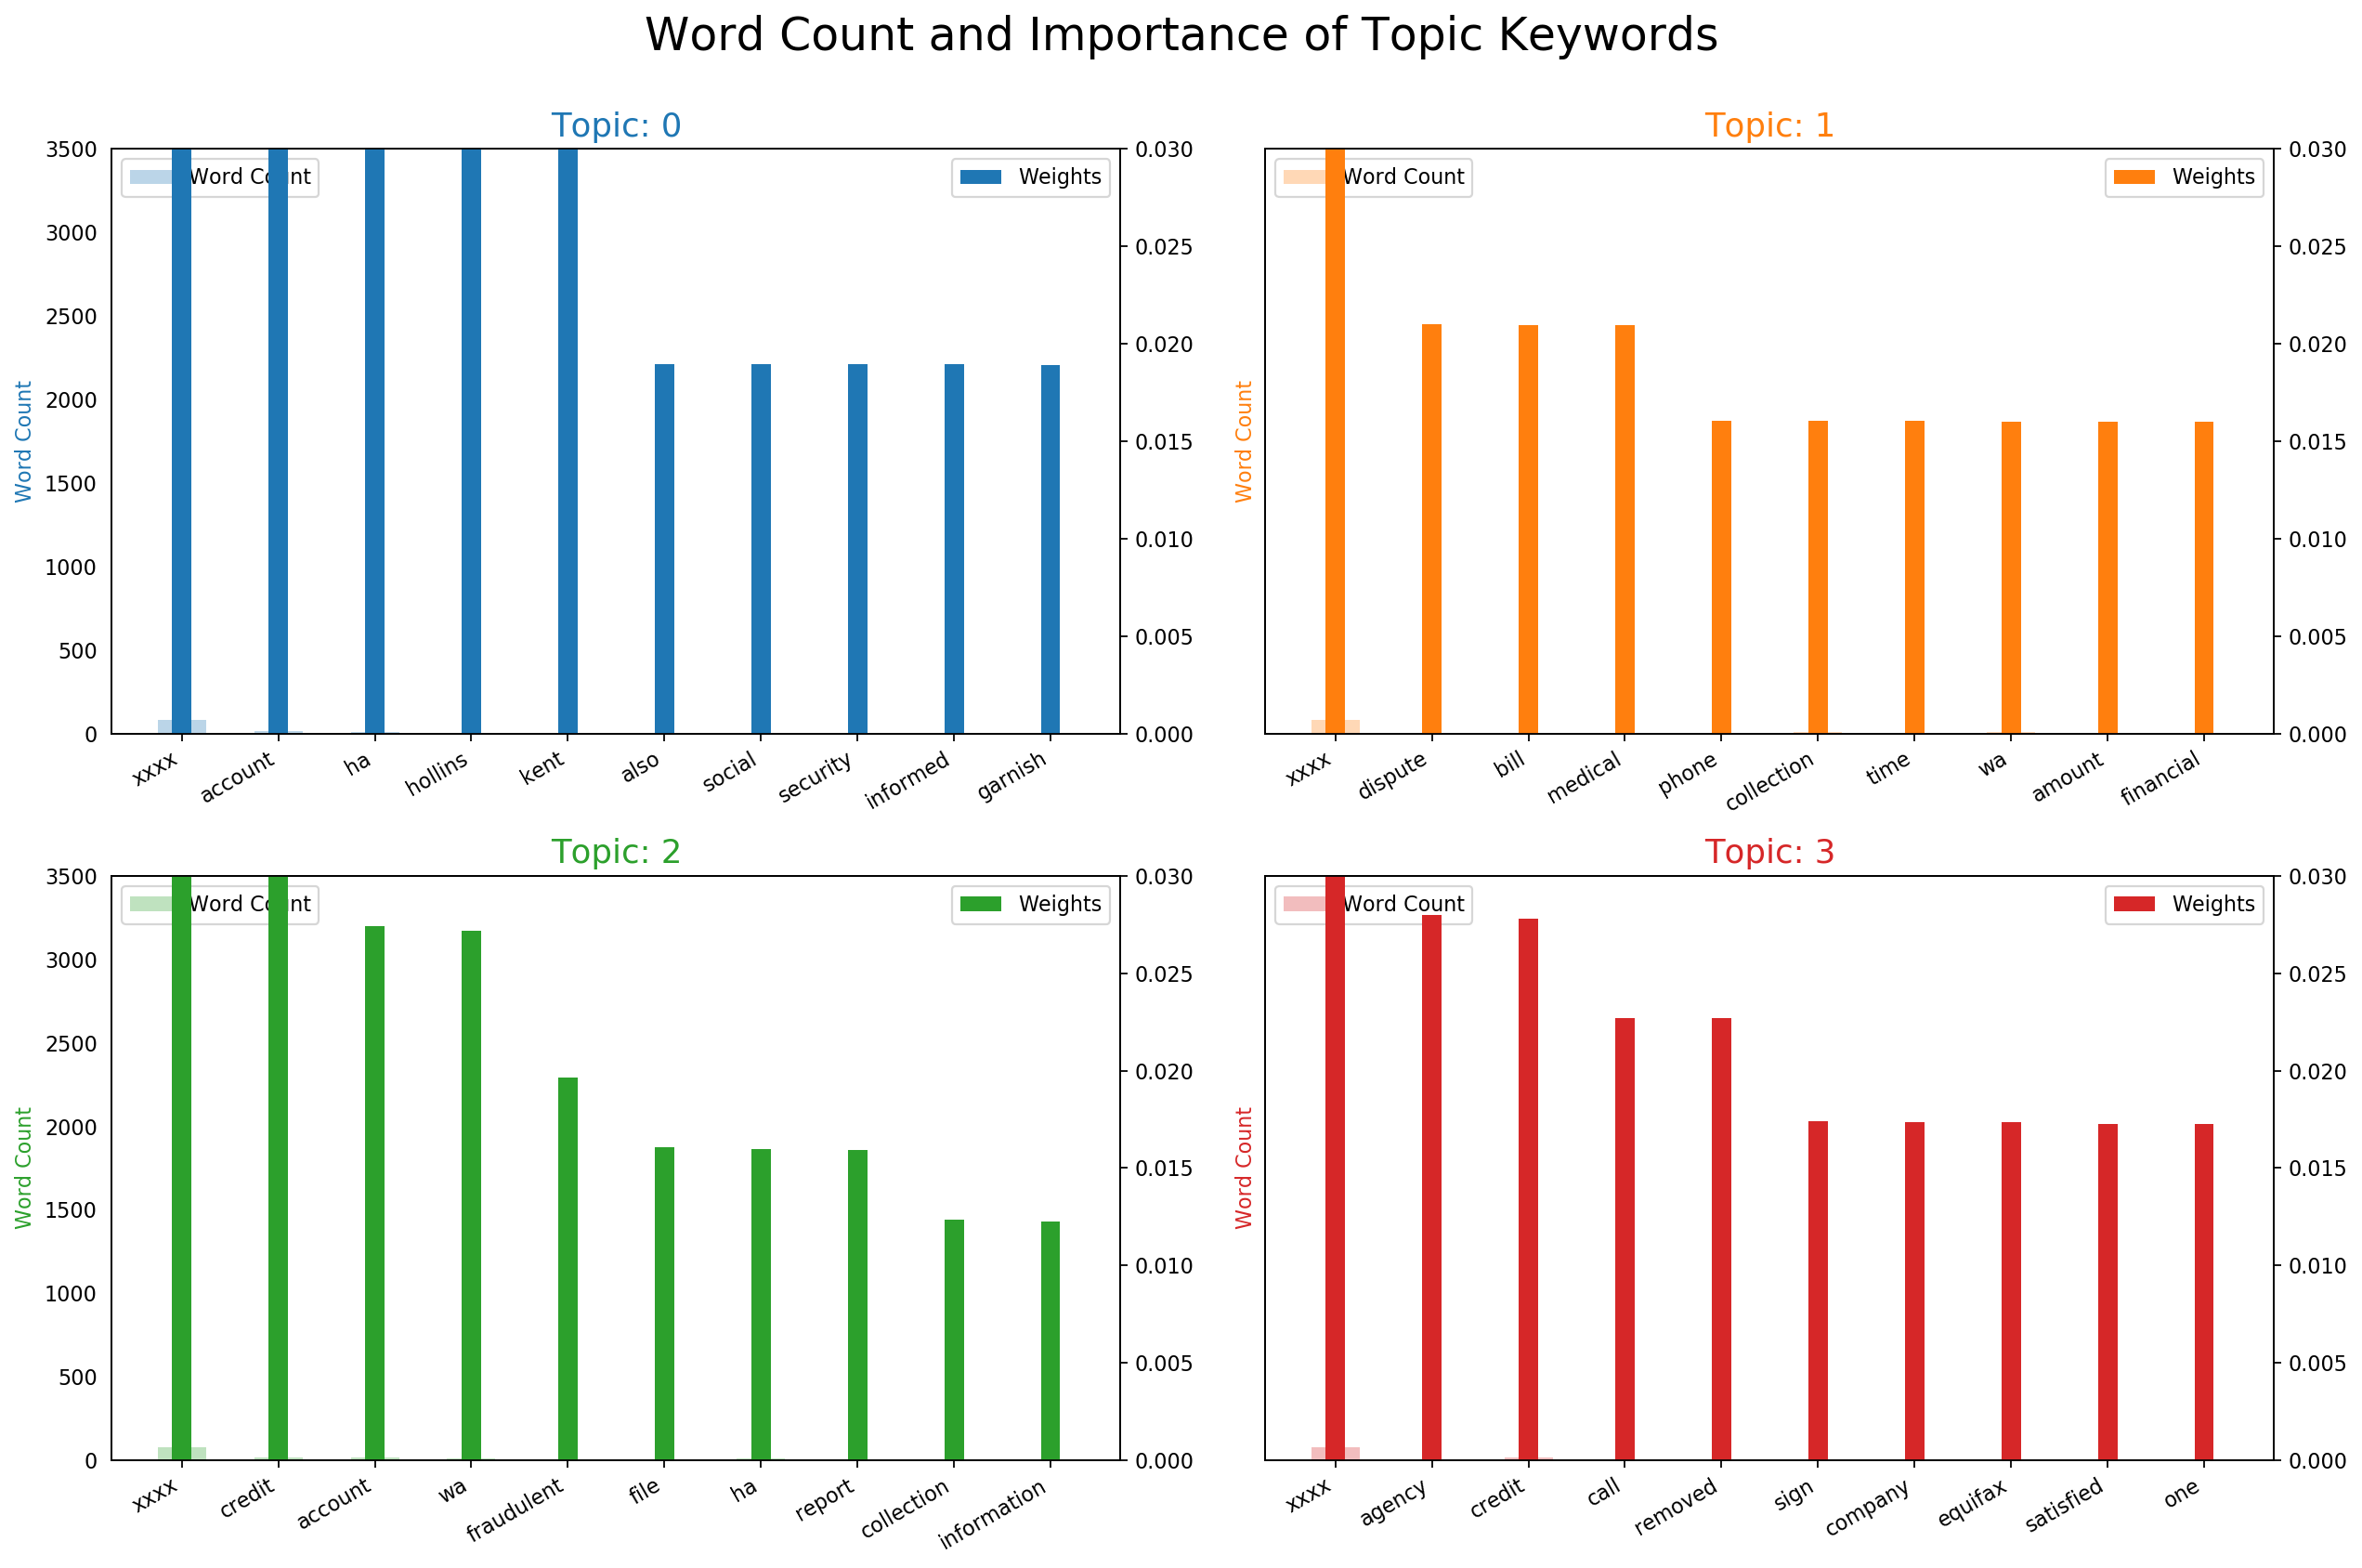

In [28]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in text for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

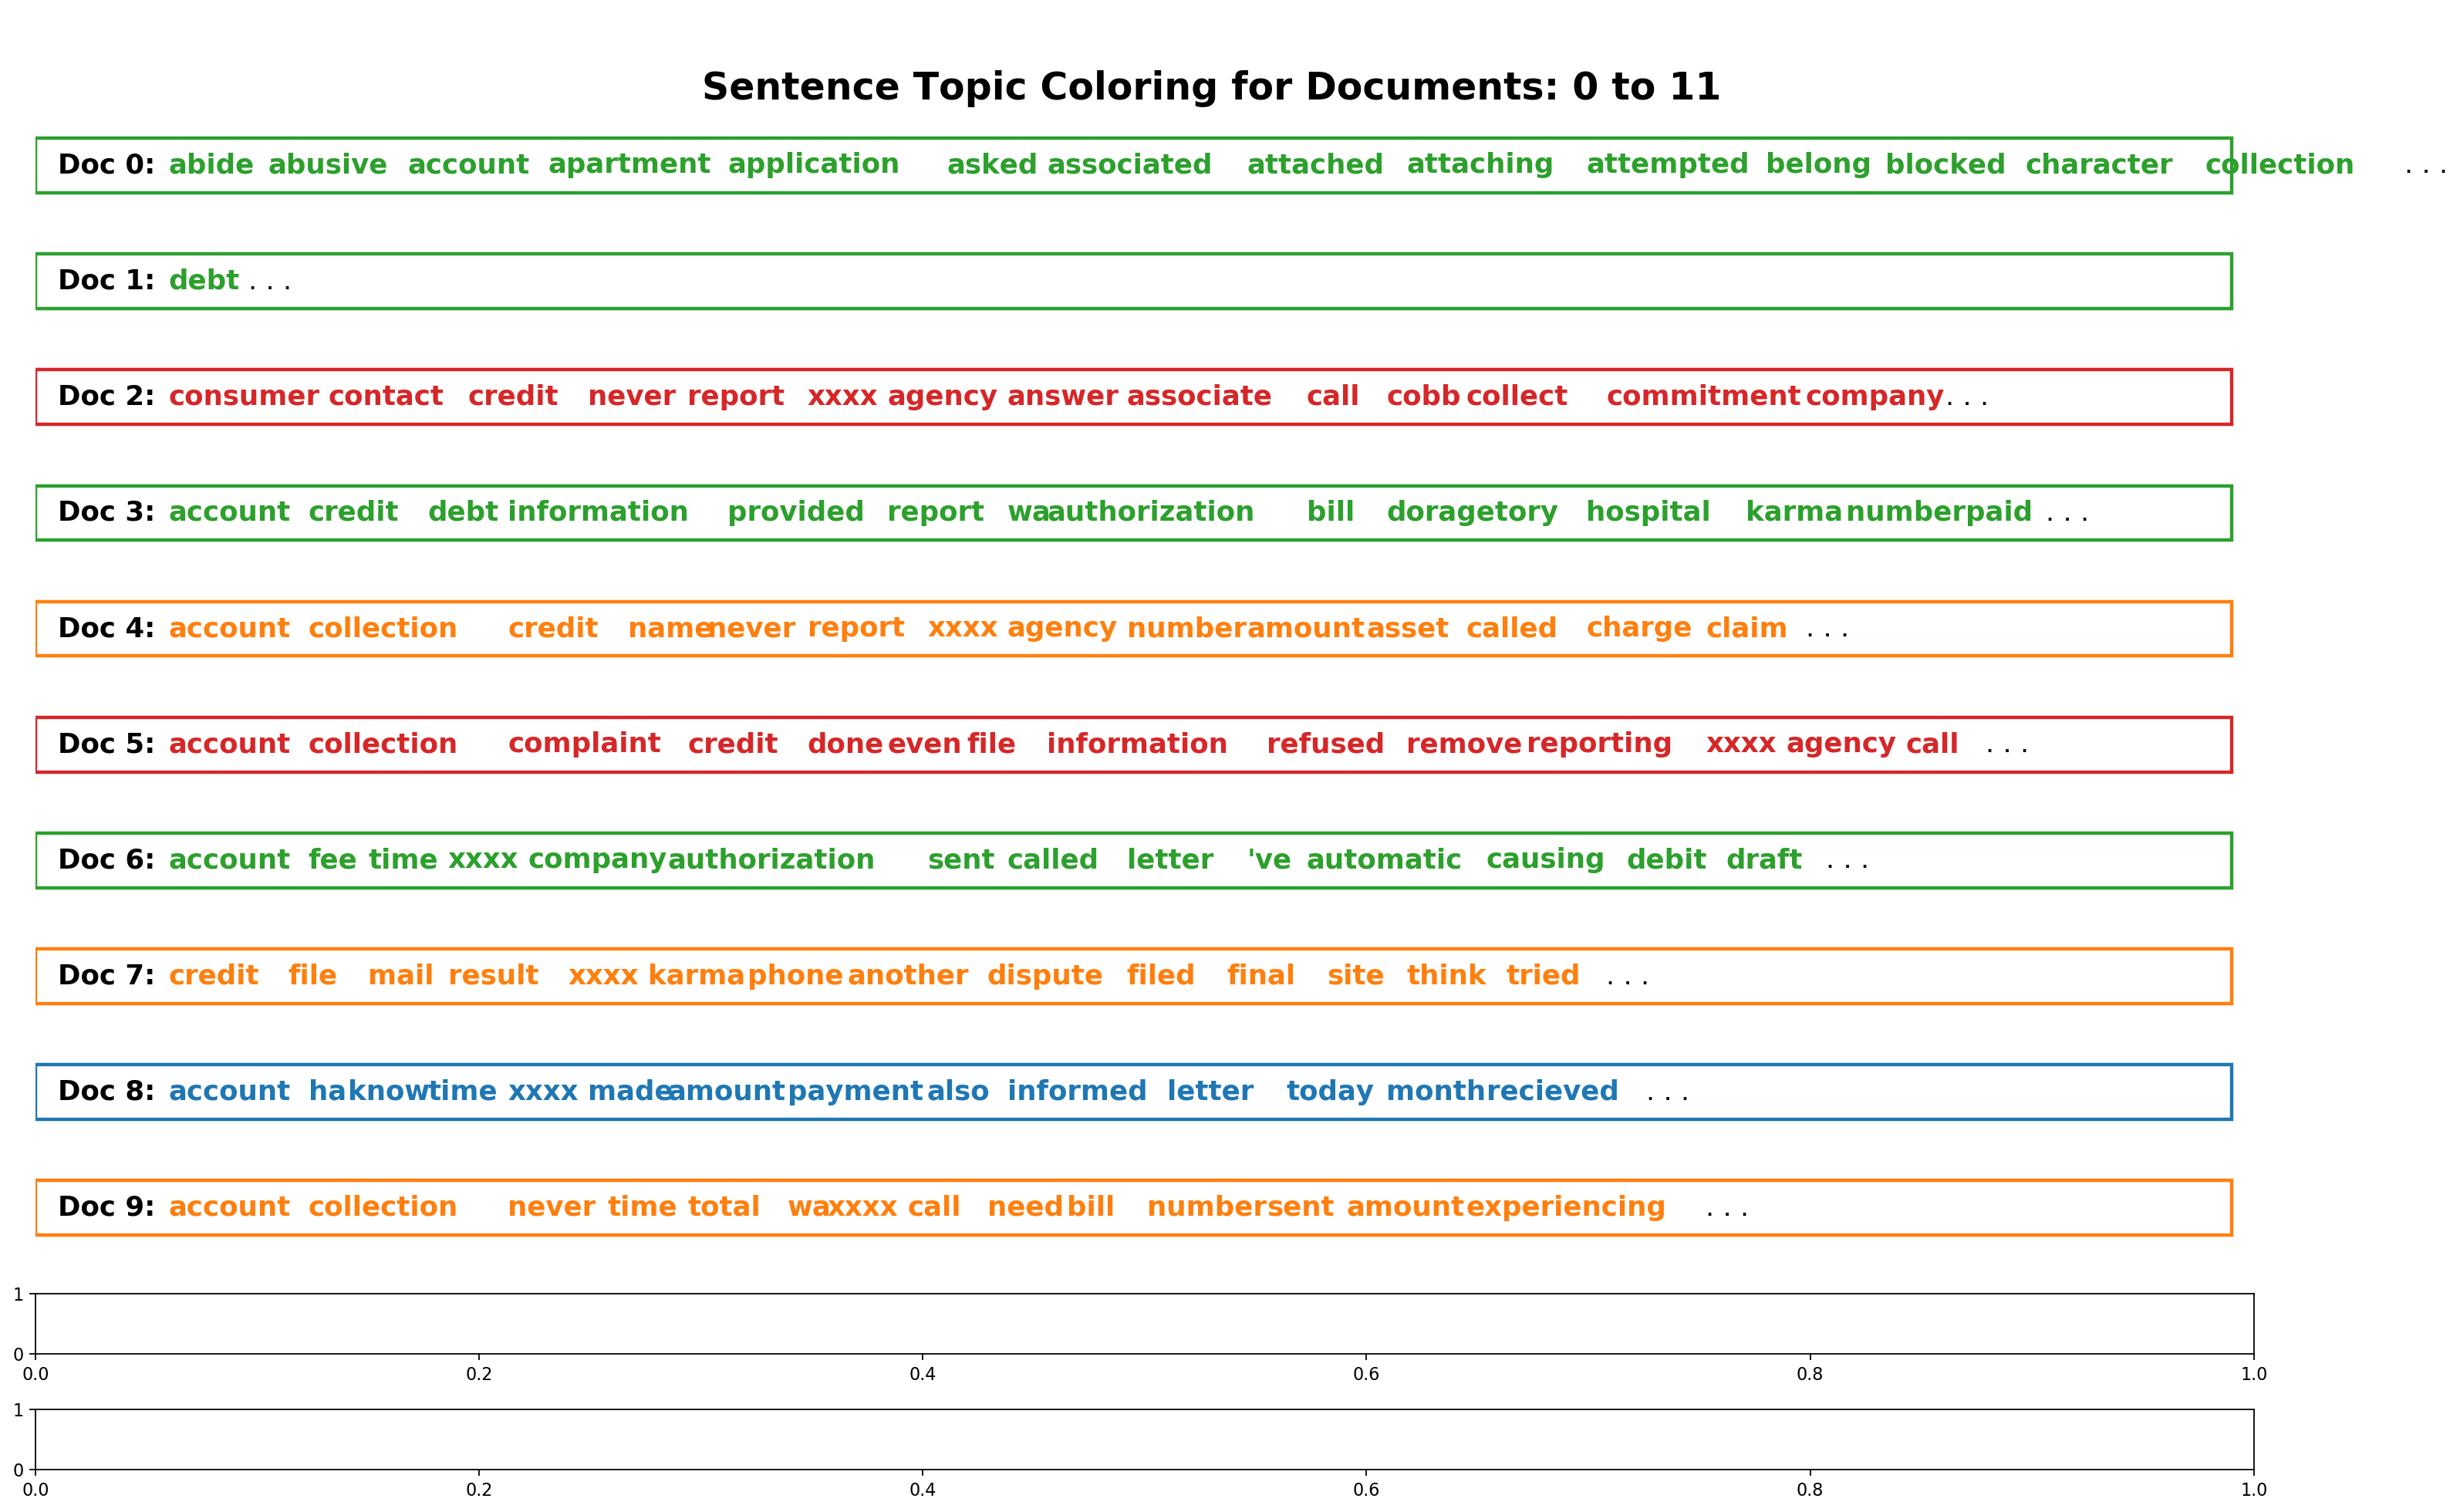

In [29]:
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=mycorpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            try:
                corp_cur = corp[i-1] 
                topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
                word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
                ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                        fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

                # Draw Rectange
                topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
                ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                       color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

                word_pos = 0.06
                for j, (word, topics) in enumerate(word_dominanttopic):
                    if j < 14:
                        ax.text(word_pos, 0.5, word,
                                horizontalalignment='left',
                                verticalalignment='center',
                                fontsize=16, color=mycolors[topics],
                                transform=ax.transAxes, fontweight=700)
                        word_pos += .009 * len(word)  # to move the word for the next iter
                        ax.axis('off')
                ax.text(word_pos, 0.5, '. . .',
                        horizontalalignment='left',
                        verticalalignment='center',
                        fontsize=16, color='black',
                        transform=ax.transAxes)       
            except:pass
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart() 